# Indicators of Heavy Traffic on I-94
In this project, I am going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of my analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

## The I-94 Traffic Dataset
John Hogue made the dataset available that I'll be working with.

In [25]:
import pandas as pd
pd.options.mode.chained_assignment = None 
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [26]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — I have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

A station located approximately midway between Minneapolis and Saint Paul records the traffic data (see the dataset documentation). For this station, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of my analysis will be about the westbound traffic in the proximity of the station. In other words, I should avoid generalizing my results for the entire I-94 highway.

## Analyzing Traffic Volume
I am going to start my analysis by examining the distribution of the traffic_volume column.

In [27]:
traffic.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


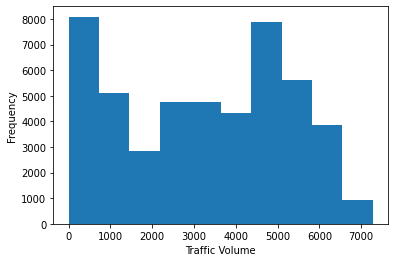

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.xlabel('Traffic Volume')
plt.show()

In [29]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives my analysis an interesting direction: comparing daytime data with nighttime data.

## Traffic Volume: Day vs. Night

I'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [30]:
traffic['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

In [31]:
daytime = traffic[(7 <= traffic['date_time'].dt.hour) & (traffic['date_time'].dt.hour < 19)]
nighttime = traffic[(19 <= traffic['date_time'].dt.hour) | (traffic['date_time'].dt.hour < 7)]

daytime['date_time'].dt.hour.value_counts().sort_index()

7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
Name: date_time, dtype: int64

In [32]:
nighttime['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

## Traffic Volume: Day vs. Night (II)

Now that I've isolated day and night, I am going to look at the histograms of traffic volume side-by-side by using a grid chart.

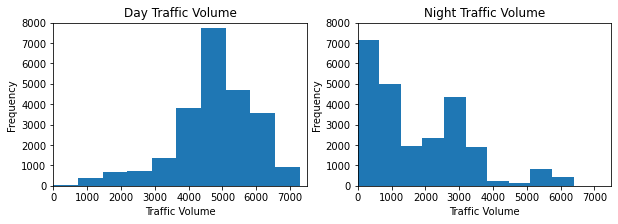

In [33]:
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
daytime['traffic_volume'].plot.hist()
plt.title('Day Traffic Volume')
plt.ylim([0, 8000])
plt.xlim([0, 7500])
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
nighttime['traffic_volume'].plot.hist()
plt.title('Night Traffic Volume')
plt.ylim([0, 8000])
plt.xlim([0, 7500])
plt.xlabel('Traffic Volume')

plt.show()

In [34]:
print(nighttime['traffic_volume'].describe())

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


In [35]:
print(daytime['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. My goal is to find indicators of heavy traffic, so I'll only focus on the daytime data moving forward.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

I am going to look at a few line plots showing how the traffic volume changes according to the following:

- Month
- Day of the week
- Time of day

In [36]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean() #group the dataset by the month column with the mean as an aggregate function.
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

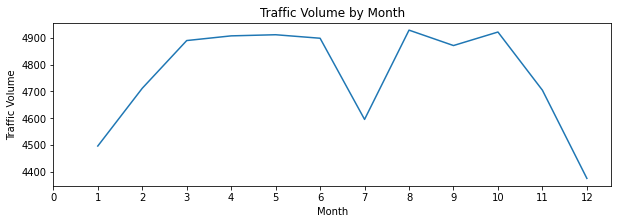

In [37]:
import numpy as np

plt.figure(figsize=(10,3))
plt.plot(by_month['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Month')
plt.title('Traffic Volume by Month')
plt.xticks(np.arange(0, 12+1, 1))
plt.show()

## Time Indicators (II)
I'll now look at a more granular indicator: day number

In [38]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

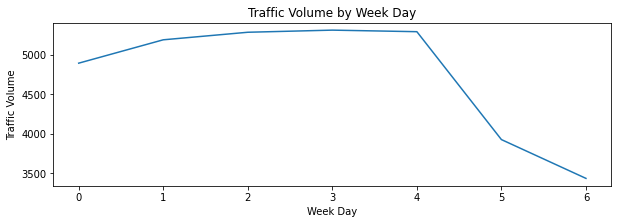

In [39]:
plt.figure(figsize=(10,3))
plt.plot(by_dayofweek['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Week Day')
plt.title('Traffic Volume by Week Day')
plt.xticks(np.arange(0, 6+1, 1))
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, I only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

## Time Indicators (III)

I'll now see what values I have based on time of the day. The weekends, however, will drag down the average values, so I am going to look only at the averages separately.

In [40]:
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] # 4 == Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


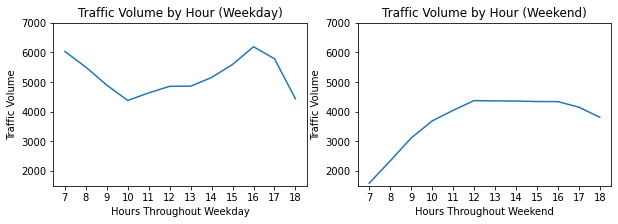

In [41]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Hours Throughout Weekday')
plt.title('Traffic Volume by Hour (Weekday)')
plt.ylim([1500, 7000])
plt.xticks(np.arange(7, 18+1, 1))

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Hours Throughout Weekend')
plt.title('Traffic Volume by Hour (Weekend)')
plt.ylim([1500, 7000])
plt.xticks(np.arange(7, 18+1, 1))

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. I see volumes of over 6,000 cars at rush hours.

To summarize, I found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides me with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical, so let's start by looking up their correlation values with `traffic_volume`.

In [42]:
daytime.corr()[['traffic_volume']]

,traffic_volume
temp,0.128317
rain_1h,0.003697
snow_1h,0.001265
clouds_all,-0.032932
traffic_volume,1.000000
month,-0.022337
dayofweek,-0.416453
hour,0.172704


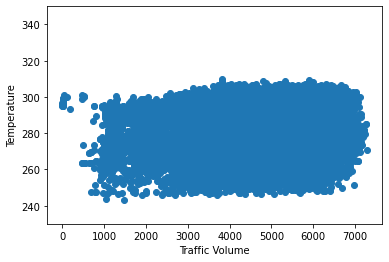

In [43]:
plt.scatter(daytime['traffic_volume'],daytime['temp'])
plt.ylim([230,350])
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.show()

I can conclude that temperature doesn't look like a solid indicator of heavy traffic.

I'll now look at the other weather-related columns: `weather_main` and `weather_description`.

In [44]:
daytime['temp'].describe()

count    23877.000000
mean       282.257596
std         13.298885
min          0.000000
25%        272.680000
50%        283.780000
75%        293.440000
max        310.070000
Name: temp, dtype: float64

## Weather Types
To start, I am going to group the data by weather_main and look at the traffic_volume averages.

In [45]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

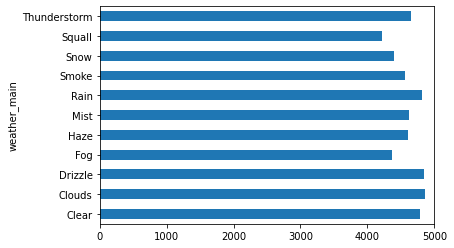

In [46]:
by_weather_main['traffic_volume'].plot.barh()
plt.xlim([0,5000])
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. I'll also group by weather_description, which has a more granular weather classification.

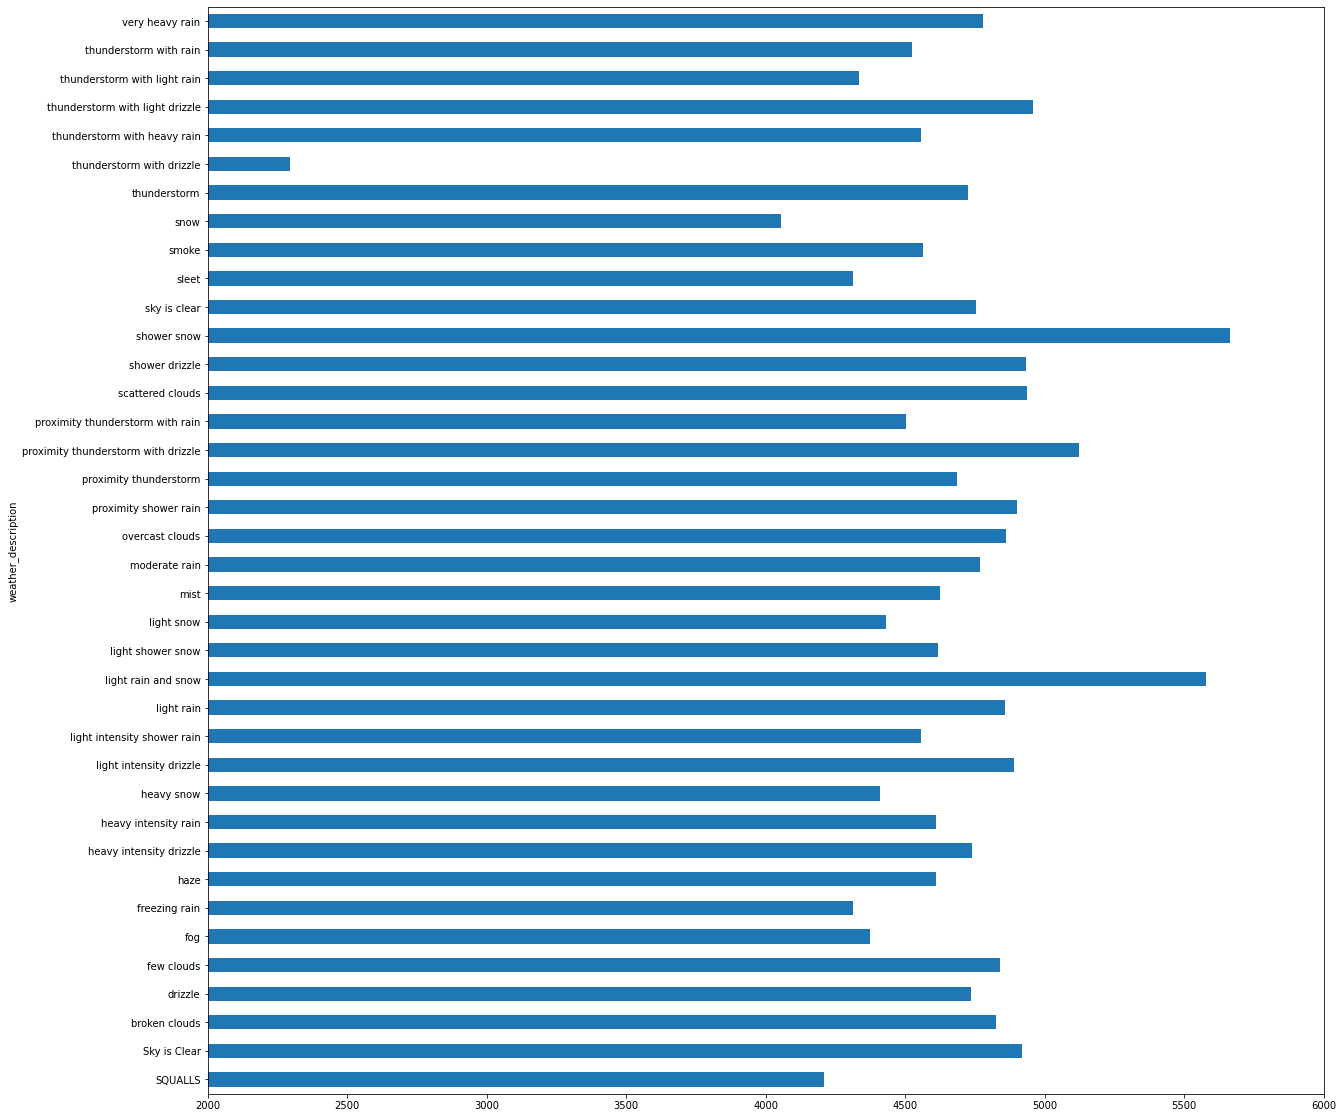

In [47]:
plt.figure(figsize=(20,20))
by_weather_description['traffic_volume'].plot.barh()
plt.xlim([2000,6000])
plt.show()

# Conclusion
In this project, I tried to find a few indicators of heavy traffic on the I-94 Interstate highway. I managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle